# ERCOT Generation Insights
All of the charts below are base upon publicly available data downloaded from ERCOT:
https://www.ercot.com/gridinfo/generation/

ERCOT does not separate sources into base vs peaker plants, so I just picked something.
Opinionated fuel mappings are below.

In [1]:
import pandas as pd

In [2]:
from ercot_data import get_ercot_data

newdf = get_ercot_data()

/Users/jimmy.wan/.pyenv/versions/miniconda3-latest/envs/jupyter/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [3]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [4]:
date_range=f'{newdf.Date.min().strftime("%Y-%m")}-{newdf.Date.max().strftime("%Y-%m")}'
width=1920/2
height=1080/2

In [5]:
chart = alt.Chart(
    newdf
).transform_timeunit(
    Date='yearweek(Date)'
).transform_aggregate(
    Total='sum(Total)',
    groupby=['Date', 'Fuel', 'Settlement Type', 'FuelType', 'SourceType']
).mark_line().encode(
    x='Date:T',
    y=alt.Y('Total:Q', title='GWh', scale=alt.Scale(domainMin=0)),
    color='Fuel:N',
    tooltip=[
        'Date',
        'Fuel',
        alt.Tooltip('Total', format=',d'),
        'Settlement Type',
        'FuelType',
        'SourceType'
    ],
    shape='Settlement Type',
).properties(
    title=f'ERCOT weekly power generation {date_range}',
    width=width,
    height=height,
)
display(chart)

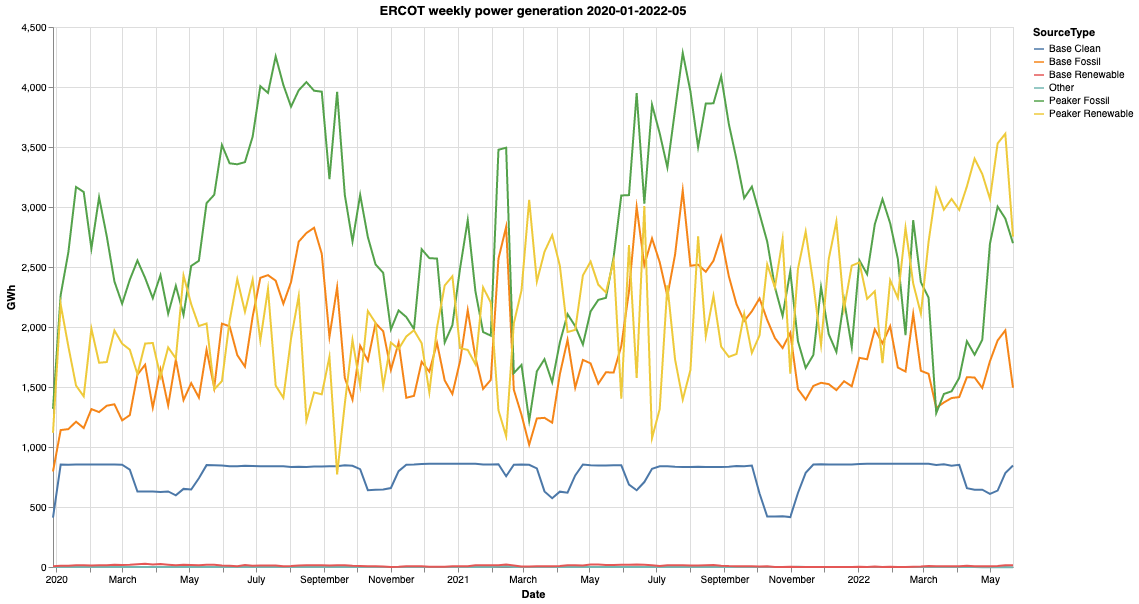

In [6]:
weekly_df = newdf.query('Fuel != "ALL SOURCES"').groupby(['Date', 'FuelType', 'LoadType', 'SourceType']).sum().reset_index().round(1)
for facet in ('FuelType', 'LoadType', 'SourceType'):
    chart = alt.Chart(
        weekly_df
    ).transform_timeunit(
        Date='yearweek(Date)'
    ).transform_aggregate(
        Total='sum(Total)',
        groupby=['Date', 'Fuel', facet],
    ).mark_line().encode(
        x='Date:T',
        y=alt.Y('Total:Q', title='GWh', scale=alt.Scale(domainMin=0)),
        color=facet,
        tooltip=['Date', facet, 'Total']
    ).properties(
        title=f'ERCOT weekly power generation {date_range}',
        width=width,
        height=height,
    )
    display(chart)